## Model selection
This notebook aims to train few models and select the best one.

In [1]:
import sys
sys.path.append("..")

In [2]:
import pandas as pd

from src.preprocess import Preprocess
from src.build_features import BuildFeatures

In [3]:
input_train = "../data/train.csv"

Function to print the evaluation metrics

In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline

def evaluate_model(y_test, y_preds):
    
    # Accuracy score
    metric_result = accuracy_score(y_test, y_preds)
    print(f"Accuracy for this model is {metric_result}.")
    
    # Classification report
    cr = classification_report(y_test, y_preds, digits=3)
    print("Classification report:")
    print(cr)
    
    # ROC
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    roc_plot = plt.plot(false_positive_rate, true_positive_rate, \
                    c='#2B94E9', label='AUC = %0.3f'% roc_auc)
    plt.title('ROC')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'m--',c='#666666')
    plt.xlim([0,1])
    plt.ylim([0,1.1])
    plt.show()

#### Model selection

Algotithms used:
- Logistic Regression
- Naive Bayes
- Random Forest Classifier
- Support Vector Machine

Metrics used to evaluate models:
- __accuracy score__: The most common evaluation metric for classification problems. It is the number of correct predictions made as a ratio of all predictions made.
- __F1 score__ (within classification report): The F1 score is a harmonic mean of recall and precision, with a higher score the better model. It is a very helpful metrics for a use case where the desired outcome is to find the best recall and precision at the same time.
- __ROC__: Area Under the ROC curve, a measure of separability. An excellent model has AUC near to the 1 which means it has good measure of separability.

In [5]:
df = pd.read_csv(input_train, sep=';')

In [6]:
preproc_train_data = Preprocess(df)
preproc = preproc_train_data.execute()

bf_train = BuildFeatures(preproc)
features = bf_train.execute()

In [7]:
from sklearn.model_selection import train_test_split

# Split the data for training and testing.
X = features.drop("Survived", axis=1)
y = features["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

#### Logistic Regression

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [10]:
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.784
Best parameters:  {'C': 1}
Best estimator:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [12]:
clf = LogisticRegression(solver='lbfgs',C=1)
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

Accuracy for this model is 0.778816199376947.
Classification report:
              precision    recall  f1-score   support

           0      0.796     0.864     0.829       199
           1      0.743     0.639     0.687       122

    accuracy                          0.779       321
   macro avg      0.770     0.752     0.758       321
weighted avg      0.776     0.779     0.775       321



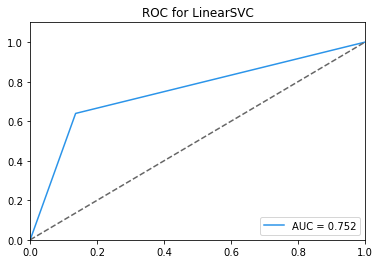

In [15]:
evaluate_model(y_test, y_preds)

#### Naive Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

Accuracy for this model is 0.7320872274143302.
Classification report:
              precision    recall  f1-score   support

           0      0.758     0.834     0.794       199
           1      0.676     0.566     0.616       122

    accuracy                          0.732       321
   macro avg      0.717     0.700     0.705       321
weighted avg      0.727     0.732     0.727       321



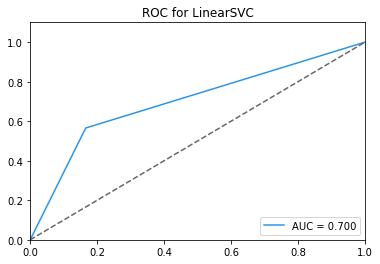

In [17]:
evaluate_model(y_test, y_preds)

#### Linear Support Vector Classification

In [22]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LinearSVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

C:\Users\Antonina\Miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Antonina\Miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Antonina\Miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Antonina\Miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Antonina\Miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=10000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [23]:
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.790
Best parameters:  {'C': 0.1}
Best estimator:  LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


In [24]:
clf = LinearSVC(C=0.1)
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

Accuracy for this model is 0.7819314641744548.
Classification report:
              precision    recall  f1-score   support

           0      0.809     0.849     0.828       199
           1      0.732     0.672     0.701       122

    accuracy                          0.782       321
   macro avg      0.770     0.761     0.765       321
weighted avg      0.780     0.782     0.780       321



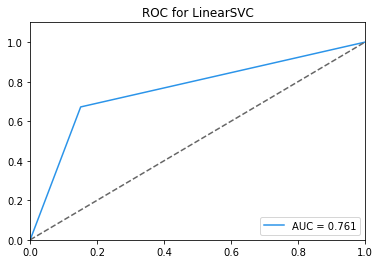

In [25]:
evaluate_model(y_test, y_preds)

#### Support Vector Classification.

In [39]:
from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 1, 10, 30],
             'gamma':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 30, 35],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.794
Best parameters:  {'C': 30, 'gamma': 0.1}
Best estimator:  SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [35]:
clf = SVC(C = 30, gamma = 0.1)
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

Accuracy for this model is 0.8130841121495327.
Classification report:
              precision    recall  f1-score   support

           0      0.803     0.925     0.860       199
           1      0.837     0.631     0.720       122

    accuracy                          0.813       321
   macro avg      0.820     0.778     0.790       321
weighted avg      0.816     0.813     0.807       321



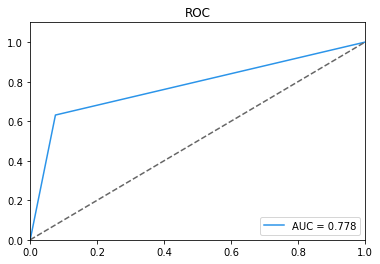

In [36]:
evaluate_model(y_test, y_preds)

#### Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


clf = RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [100, 140, 180],
    'min_samples_leaf': [1,2,3,4],
}

grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [60]:
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.786
Best parameters:  {'min_samples_leaf': 2, 'n_estimators': 140}
Best estimator:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [61]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

Accuracy for this model is 0.838006230529595.
Classification report:
              precision    recall  f1-score   support

           0      0.827     0.935     0.877       199
           1      0.865     0.680     0.761       122

    accuracy                          0.838       321
   macro avg      0.846     0.808     0.819       321
weighted avg      0.841     0.838     0.833       321



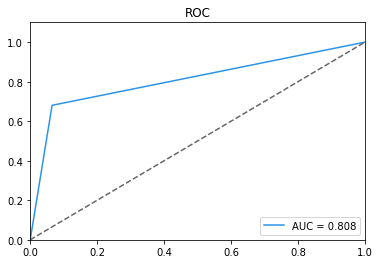

In [62]:
evaluate_model(y_test, y_preds)

#### Model previously proposed

In [63]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

Accuracy for this model is 0.8068535825545171.
Classification report:
              precision    recall  f1-score   support

           0      0.802     0.915     0.854       199
           1      0.819     0.631     0.713       122

    accuracy                          0.807       321
   macro avg      0.810     0.773     0.784       321
weighted avg      0.808     0.807     0.801       321



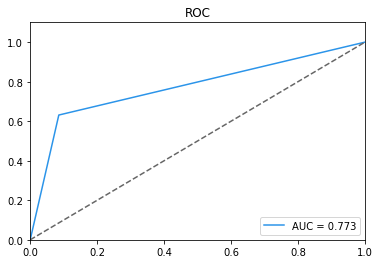

In [64]:
evaluate_model(y_test, y_preds)

#### Conclusion

Based on given metrics, model chosen by me has slighlty better parameters than already proposed ones.
I tried to test few different classification algorithms that I knew: Logistic Regression, Naive Bayes, SVM and Random Forest Classifier gets the most promising results. This is why I decided not to change the algorithm but to tune its parameters.

I was able to get better accuracy score, better F1 score for both classes and better AUC which shows better separabilty.